In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from mydata import *
from collections import Counter
from pprint import pprint
from datetime import datetime

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
def get_public_tweets(Page_number):
    # generate empty list to hold tweets
    public_tweets = []
    # loop through all pages and request tweets using tweepy API
    for x in range(Page_number):
        response = api.user_timeline("ChiraqHomicide", page=x)
        public_tweets.extend(response)
    return public_tweets

In [4]:
all_tweets = get_public_tweets(50)

In [5]:
with open("Output.txt", "w") as text_file:
    counter =1
    for tweet in all_tweets:
        text_file.writelines("------------")
        text_file.writelines("\n")
        text_file.writelines(f"{counter}: Created at {tweet['created_at']}")
        text_file.writelines("\n")
        text_file.writelines(tweet['text'])
        text_file.writelines("\n")
        counter = counter +1

In [14]:
# A list to hold tweet timestamps
tweet_times = []
tweet_texts = []

# Loop through all tweets
for tweet in all_tweets:
    raw_time = tweet["created_at"]
    text = tweet["text"]
#     print(raw_time)
    tweet_times.append(raw_time)
    tweet_texts.append(text)
    
# Convert tweet timestamps to datetime objects that can be manipulated by Python

converted_timestamps = []
for raw_time in tweet_times:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)

In [7]:
# generate date info from time stamps
date_list = []

for timestamp in converted_timestamps:
    date = f"{timestamp.year}-{timestamp.month}-{timestamp.day}"
    date_list.append(date)

In [8]:
date_info = Counter(date_list)
date_info_df = pd.Series(date_info)

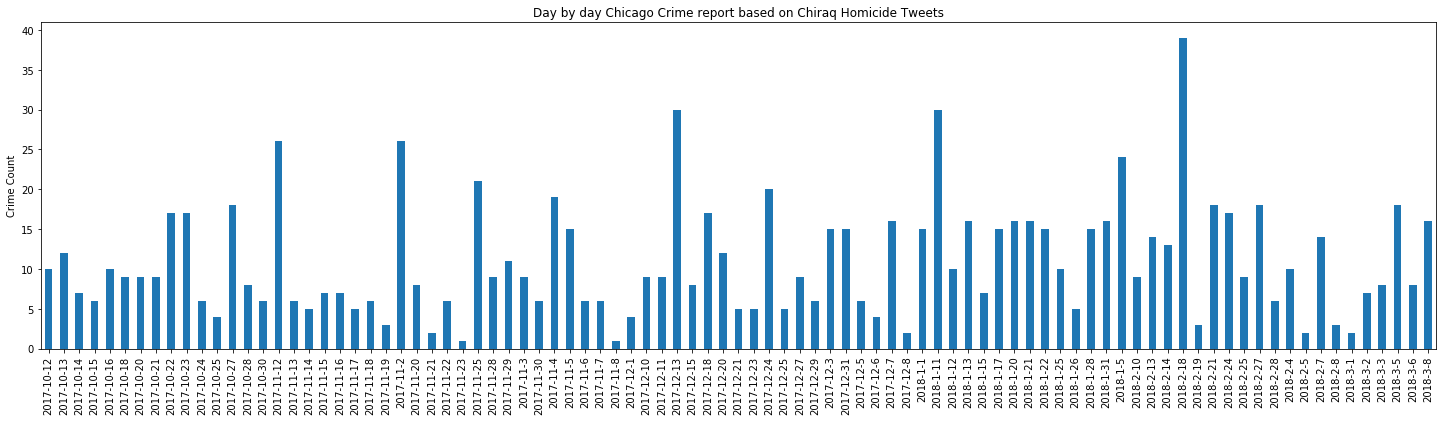

In [11]:
# Create a plot  
date_info_df.plot.bar(figsize=(25, 6))
plt.ylabel("Crime Count")
# plt.xlabel("Date")
plt.title("Day by day Chicago Crime report based on Chiraq Homicide Tweets")
plt.show()

In [12]:
all_tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [13]:
pprint(all_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Mar 08 05:01:26 +0000 2018',
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/cPMyMSUnQk',
                         'expanded_url': 'https://twitter.com/CSTbreaking/status/971226623109365761/photo/1',
                         'id': 971226620345200640,
                         'id_str': '971226620345200640',
                         'indices': [49, 72],
                         'media_url': 'http://pbs.twimg.com/media/DXp9dyYUMAAZDIM.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/DXp9dyYUMAAZDIM.jpg',
                         'sizes': {'large': {'h': 259,
                                             'resize': 'fit',
                                             'w': 396},
                                   'medium': {'h': 259,
                                              'resize': 'fit',
                                              'w': 396},
          

In [76]:
tweet_df = pd.DataFrame({
    "TimeStamp": tweet_times,
    "Date": date_list,
    "Converted Time": converted_timestamps,
    "Text": tweet_texts
})
tweet_df = tweet_df[["Date", "Text", "TimeStamp", "Converted Time"]]

In [23]:
tweet_df.head(10)

,Date,Text,TimeStamp,Converted Time
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00
5,2018-3-8,Man shot on Northwest Side https://t.co/JWoqVM...,Thu Mar 08 04:58:17 +0000 2018,2018-03-08 04:58:17+00:00
6,2018-3-8,Three youths were shot in a possible gang-rela...,Thu Mar 08 04:56:41 +0000 2018,2018-03-08 04:56:41+00:00
7,2018-3-8,2 shot in mile-long crime scene in Robbins: ht...,Thu Mar 08 04:51:58 +0000 2018,2018-03-08 04:51:58+00:00
8,2018-3-6,Man shot while cutting hair at Woodlawn apartm...,Tue Mar 06 22:33:52 +0000 2018,2018-03-06 22:33:52+00:00
9,2018-3-6,"Delivery driver hit with hammer, robbed\n\nhtt...",Tue Mar 06 22:33:22 +0000 2018,2018-03-06 22:33:22+00:00


In [24]:
tweet_df.to_csv("ChiraqTweets01.csv")

In [44]:
tweet_date_df = pd.DataFrame(tweet_df.groupby("Date").size()).reset_index()

In [47]:
tweet_date_df.columns = ["Date", "Count"]
tweet_date_df.head()

,Date,Count
0,2017-10-12,10
1,2017-10-13,12
2,2017-10-14,7
3,2017-10-15,6
4,2017-10-16,10


In [49]:
tweet_date_df["Accum"] = ""
tweet_date_df.head()

,Date,Count,Accum
0,2017-10-12,10,
1,2017-10-13,12,
2,2017-10-14,7,
3,2017-10-15,6,
4,2017-10-16,10,


In [53]:
accum = 0
for index, row in tweet_date_df.iterrows():
    accum = accum + row["Count"]
    tweet_date_df.set_value(index, "Accum", accum)
tweet_date_df.head()

,Date,Count,Accum
0,2017-10-12,10,10
1,2017-10-13,12,22
2,2017-10-14,7,29
3,2017-10-15,6,35
4,2017-10-16,10,45


In [66]:
tweet_date_df.to_csv("ChiraqTweets02.csv")

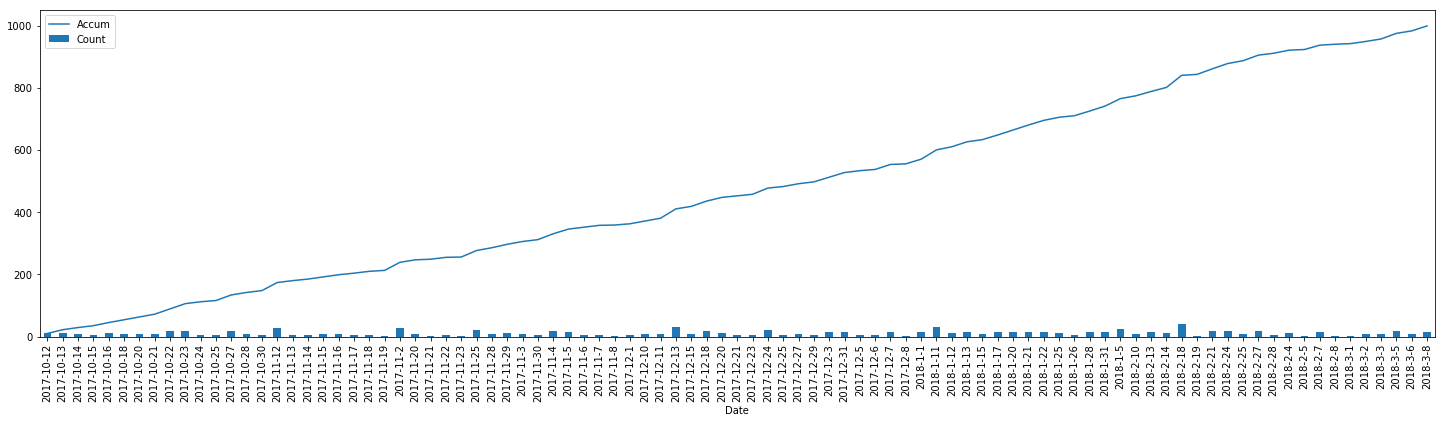

In [65]:
ax = tweet_date_df.plot.line("Date", "Accum", figsize=(25, 6))
tweet_date_df.plot.bar("Date", "Count", figsize=(25,6), ax = ax)
plt.show()

In [108]:
tweet_df["Shooting"] = 0
tweet_df.head()

,Date,Text,TimeStamp,Converted Time,Shooting
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00,0
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00,0
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00,0
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00,0
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00,0


In [109]:
for index, row in tweet_df.iterrows():
    tx = row["Text"].lower()
    if ("shot" in tx or "shooting" in tx or "shoots" in tx or "gun" in tx or
        "bullet" in tx or "crossfire" in tx or "shootout" in tx):
        tweet_df.set_value(index, "Shooting", 1)

In [110]:
tweet_df.head()

,Date,Text,TimeStamp,Converted Time,Shooting
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00,1
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00,1
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00,1
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00,1
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00,1


In [111]:
tweet_df.to_csv("ChiraqTweets01.csv")

In [112]:
tweet_df["Shooting"].value_counts()

1    902
0     98
Name: Shooting, dtype: int64

In [113]:
tweet_df.groupby("Date")["Shooting"].size()

Date
2017-10-12    10
2017-10-13    12
2017-10-14     7
2017-10-15     6
2017-10-16    10
2017-10-18     9
2017-10-20     9
2017-10-21     9
2017-10-22    17
2017-10-23    17
2017-10-24     6
2017-10-25     4
2017-10-27    18
2017-10-28     8
2017-10-30     6
2017-11-12    26
2017-11-13     6
2017-11-14     5
2017-11-15     7
2017-11-16     7
2017-11-17     5
2017-11-18     6
2017-11-19     3
2017-11-2     26
2017-11-20     8
2017-11-21     2
2017-11-22     6
2017-11-23     1
2017-11-25    21
2017-11-28     9
              ..
2018-1-15      7
2018-1-17     15
2018-1-20     16
2018-1-21     16
2018-1-22     15
2018-1-25     10
2018-1-26      5
2018-1-28     15
2018-1-31     16
2018-1-5      24
2018-2-10      9
2018-2-13     14
2018-2-14     13
2018-2-18     39
2018-2-19      3
2018-2-21     18
2018-2-24     17
2018-2-25      9
2018-2-27     18
2018-2-28      6
2018-2-4      10
2018-2-5       2
2018-2-7      14
2018-2-8       3
2018-3-1       2
2018-3-2       7
2018-3-3       8
2018-3-5 

In [115]:
from chicago import NEIGHBORHOODS
from chicago import COMMUNITY_AREAS

In [121]:
community_list = []
for ca in COMMUNITY_AREAS:
    community_list.append(ca.name)
neighborhood_list = []
for n in NEIGHBORHOODS:
    neighborhood_list.append(n.name)

In [123]:
print(community_list[:10])

['Rogers Park', 'West Ridge', 'Uptown', 'Lincoln Square', 'North Center', 'Lake View', 'Lincoln Park', 'Near North Side', 'Edison Park', 'Norwood Park']


In [124]:
tweet_df["Neighborhood"] = ""
tweet_df.head()

,Date,Text,TimeStamp,Converted Time,Shooting,Neighborhood
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00,1,
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00,1,
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00,1,
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00,1,
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00,1,


In [125]:
for index, row in tweet_df.iterrows():
    tx = row["Text"]
    for nb in neighborhood_list:
        if nb in tx:
            tweet_df.set_value(index, "Neighborhood", nb)

In [126]:
tweet_df.head()

,Date,Text,TimeStamp,Converted Time,Shooting,Neighborhood
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00,1,
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00,1,Austin
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00,1,
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00,1,Humboldt Park
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00,1,Chatham


In [127]:
tweet_df.to_csv("ChiraqTweets01.csv")

In [128]:
tweet_df["Community"] = ""
tweet_df.head()

,Date,Text,TimeStamp,Converted Time,Shooting,Neighborhood,Community
0,2018-3-8,"Man, 43, shot in Gresham\nhttps://t.co/STNbZjW...",Thu Mar 08 05:01:26 +0000 2018,2018-03-08 05:01:26+00:00,1,,
1,2018-3-8,Man critically wounded in Austin drive-by shoo...,Thu Mar 08 05:00:57 +0000 2018,2018-03-08 05:00:57+00:00,1,Austin,
2,2018-3-8,Married couple shot in targeted home invasion ...,Thu Mar 08 05:00:40 +0000 2018,2018-03-08 05:00:40+00:00,1,,
3,2018-3-8,"Boy, 17, shot to death in Humboldt Park \n\nht...",Thu Mar 08 04:59:57 +0000 2018,2018-03-08 04:59:57+00:00,1,Humboldt Park,
4,2018-3-8,23-year-old man shot while sitting in car in C...,Thu Mar 08 04:59:03 +0000 2018,2018-03-08 04:59:03+00:00,1,Chatham,


In [129]:
for index, row in tweet_df.iterrows():
    tx = row["Text"]
    for co in community_list:
        if co in tx:
            tweet_df.set_value(index, "Community", co)

In [130]:
tweet_df.to_csv("ChiraqTweets01.csv")

In [131]:
%%time
all_tweets = get_public_tweets(250)

CPU times: user 7.13 s, sys: 550 ms, total: 7.68 s
Wall time: 1min 27s


In [136]:
all_tweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Mar 08 05:01:26 +0000 2018',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/cPMyMSUnQk',
    'expanded_url': 'https://twitter.com/CSTbreaking/status/971226623109365761/photo/1',
    'id': 971226620345200640,
    'id_str': '971226620345200640',
    'indices': [49, 72],
    'media_url': 'http://pbs.twimg.com/media/DXp9dyYUMAAZDIM.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DXp9dyYUMAAZDIM.jpg',
    'sizes': {'large': {'h': 259, 'resize': 'fit', 'w': 396},
     'medium': {'h': 259, 'resize': 'fit', 'w': 396},
     'small': {'h': 259, 'resize': 'fit', 'w': 396},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 971226623109365761,
    'source_status_id_str': '971226623109365761',
    'source_user_id': 2382642386,
    'source_user_id_str': '2382642386',
    'type': 'photo',
    'url': 'https://t.co/cPMyMSUnQk'}],
  'symbols': [],
  'urls': [{'display_url': 

In [138]:
count_tweets = api.user_timeline("ChiraqHomicide", count = 201)

In [139]:
len(count_tweets)

200

In [137]:
count_tweets[0]["text"]

'Man, 43, shot in Gresham\nhttps://t.co/STNbZjWq03 https://t.co/cPMyMSUnQk'